In [82]:
import os

import re
import pandas as pd
import numpy as np

import spacy
from spacy import displacy

import networkx as nx

import matplotlib.pyplot as plt

In [83]:
ner = spacy.load('en_core_web_sm')

In [84]:
all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [85]:
book = all_books[0]
book_text = open(book).read()
book_doc = ner(book_text)

In [86]:
displacy.render(book_doc[0:100], style='ent')

In [87]:
character_df = pd.read_csv('characters.csv')

In [88]:
print(character_df.head(), '\n')
character_df.info()

                                  book      character
0  Category:Baptism of Fire characters         Adalia
1  Category:Baptism of Fire characters          Adela
2  Category:Baptism of Fire characters  Aen Saevherne
3  Category:Baptism of Fire characters       Aevenien
4  Category:Baptism of Fire characters         Aglaïs 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book       1275 non-null   object
 1   character  1275 non-null   object
dtypes: object(2)
memory usage: 20.0+ KB


In [89]:
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [90]:
# pd.set_option('display.max_rows', None)
print(character_df.head(10), '\n')
character_df.info()

                                  book      character character_firstname
0  Category:Baptism of Fire characters         Adalia              Adalia
1  Category:Baptism of Fire characters          Adela               Adela
2  Category:Baptism of Fire characters  Aen Saevherne                 Aen
3  Category:Baptism of Fire characters       Aevenien            Aevenien
4  Category:Baptism of Fire characters         Aglaïs              Aglaïs
5  Category:Baptism of Fire characters        Albrich             Albrich
6  Category:Baptism of Fire characters         Amavet              Amavet
7  Category:Baptism of Fire characters  Angus Bri Cri               Angus
8  Category:Baptism of Fire characters    Anna Kameny                Anna
9  Category:Baptism of Fire characters   Anzelm Aubry              Anzelm 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               ---

In [91]:
sent_entity_df = []

for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [92]:
print(sent_entity_df.head(), '\n')
sent_entity_df.info()

                                            sentence                 entities
0  (﻿The, Limits, of, the, Possible, \n, I, \n, "...                       []
1  (", It, 's, been, an, hour, and, a, quarter, s...  [an hour and a quarter]
2                             (He, 's, done, for, .)                       []
3  (", \n, The, townsfolk, ,, huddled, together, ...                       []
4  (A, fat, man, dressed, in, a, yellow, smock, \...               [one foot] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  11311 non-null  object
 1   entities  11311 non-null  object
dtypes: object(2)
memory usage: 176.9+ KB


In [93]:
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

In [94]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
print(sent_entity_df_filtered.head(10), '\n')
sent_entity_df_filtered.info()

                                              sentence         entities  \
96   (Is, there, anything, keeping, you, in, this, ...  [Geralt, Rivia]   
104  (", \n, ", Borch, ,, ", replied, Geralt, ,, wh...  [Borch, Geralt]   
108  (", \n, ", There, are, some, ,, ", Geralt, rep...         [Geralt]   
140  (", I, forgot, ,, ", Three, Jackdaws, winked, ...  [Three, Geralt]   
151  (Geralt, loosened, his, belt, ,, removed, his,...         [Geralt]   
157  (", Do, the, girls, speak, the, common, langua...         [Geralt]   
160  (How, 's, your, soup, ,, Geralt, ?, ", \n, ", ...         [Geralt]   
172  (Yet, there, is, a, certain, principal, underl...         [Geralt]   
201    (", Bad, example, ,, ", interrupted, Geralt, .)    [Bad, Geralt]   
211  (", I, do, not, hunt, dragons, ,, ", Geralt, r...         [Geralt]   

    character_entities  
96            [Geralt]  
104           [Geralt]  
108           [Geralt]  
140           [Geralt]  
151           [Geralt]  
157           [Geralt]  

In [95]:
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])                                                                              

/var/folders/qd/kx5sjcnd6899vp4qbrmh9x_m0000gn/T/ipykernel_16245/1758828135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])


In [96]:
# pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities,character_entities
96,"(Is, there, anything, keeping, you, in, this, ...","[Geralt, Rivia]",[Geralt]
104,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
108,"("", \n, "", There, are, some, ,, "", Geralt, rep...",[Geralt],[Geralt]
140,"("", I, forgot, ,, "", Three, Jackdaws, winked, ...","[Three, Geralt]",[Geralt]
151,"(Geralt, loosened, his, belt, ,, removed, his,...",[Geralt],[Geralt]
157,"("", Do, the, girls, speak, the, common, langua...",[Geralt],[Geralt]
160,"(How, 's, your, soup, ,, Geralt, ?, "", \n, "", ...",[Geralt],[Geralt]
172,"(Yet, there, is, a, certain, principal, underl...",[Geralt],[Geralt]
201,"("", Bad, example, ,, "", interrupted, Geralt, .)","[Bad, Geralt]",[Geralt]
211,"("", I, do, not, hunt, dragons, ,, "", Geralt, r...",[Geralt],[Geralt]


In [97]:
sent_entity_df_filtered.index[-1]

11309

In [98]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i]['character_entities']), [])
    
    # if i > 100 and i < 200:
    #     print(char_list)

    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [99]:
# pd.set_option('display.max_rows', None)
relationship_df = pd.DataFrame(relationships)
relationship_df.head(10)

,source,target
0,Geralt,Niedamir
1,Geralt,Niedamir
2,Geralt,Niedamir
3,Niedamir,Geralt
4,Niedamir,Geralt
5,Niedamir,Geralt
6,Niedamir,Geralt
7,Niedamir,Geralt
8,Niedamir,Geralt
9,Geralt,Eyck


In [100]:
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df.head(10)

,source,target
0,Geralt,Niedamir
1,Geralt,Niedamir
2,Geralt,Niedamir
3,Geralt,Niedamir
4,Geralt,Niedamir
5,Geralt,Niedamir
6,Geralt,Niedamir
7,Geralt,Niedamir
8,Geralt,Niedamir
9,Eyck,Geralt


In [101]:
relationship_df['value'] = 1
relationship_df = relationship_df.groupby(['source', 'target'], sort = False, as_index = False).sum()
relationship_df

,source,target,value
0,Geralt,Niedamir,19
1,Eyck,Geralt,52
2,Dorregaray,Geralt,36
3,Dorregaray,Yennefer,100
4,Geralt,Yarpen,15
5,Gyllenstiern,Niedamir,33
6,Geralt,Kennet,2
7,Dorregaray,Yarpen,8
8,Boholt,Yennefer,66
9,Boholt,Gyllenstiern,19


In [103]:
G = nx.from_pandas_edgelist(relationship_df, 
                            source = 'source', 
                            target = 'target', 
                            edge_attr = 'value', 
                            create_using = nx.Graph())

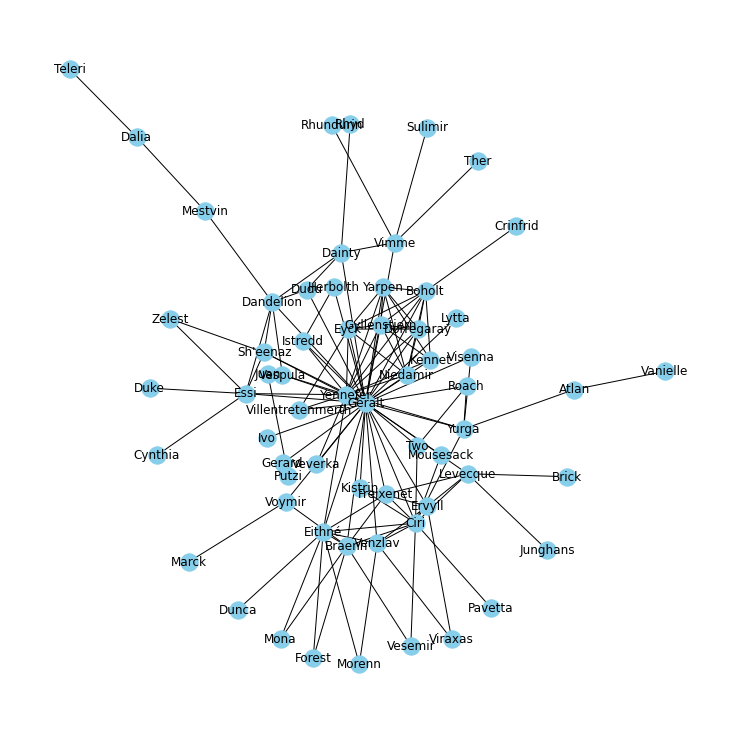

In [104]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'skyblue', edge_cmap = plt.cm.Blues, pos = pos)
plt.show()

In [113]:
from pyvis.network import Network
net = Network(width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show('witcher.html')

In [127]:
degree_dict = nx.degree_centrality(G)
degree_dict

{'Geralt': 0.5901639344262295,
 'Niedamir': 0.11475409836065574,
 'Eyck': 0.13114754098360656,
 'Dorregaray': 0.11475409836065574,
 'Yennefer': 0.26229508196721313,
 'Yarpen': 0.13114754098360656,
 'Gyllenstiern': 0.13114754098360656,
 'Kennet': 0.0819672131147541,
 'Boholt': 0.14754098360655737,
 'Crinfrid': 0.01639344262295082,
 'Villentretenmerth': 0.04918032786885246,
 'Istredd': 0.04918032786885246,
 'Herbolth': 0.03278688524590164,
 'Ivo': 0.01639344262295082,
 'Two': 0.04918032786885246,
 'Vespula': 0.04918032786885246,
 'Dainty': 0.0819672131147541,
 'Dandelion': 0.11475409836065574,
 'Rhyd': 0.01639344262295082,
 'Vimme': 0.0819672131147541,
 'Ther': 0.01639344262295082,
 'Sulimir': 0.01639344262295082,
 'Rhundurin': 0.01639344262295082,
 'Dudu': 0.04918032786885246,
 "Sh'eenaz": 0.0819672131147541,
 'Dalia': 0.03278688524590164,
 'Teleri': 0.01639344262295082,
 'Mestvin': 0.03278688524590164,
 'Essi': 0.11475409836065574,
 'Gerard': 0.01639344262295082,
 'Zelest': 0.032786885

<AxesSubplot: >

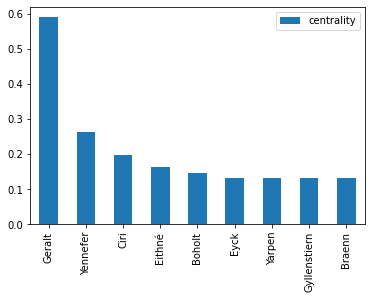

In [120]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot: >

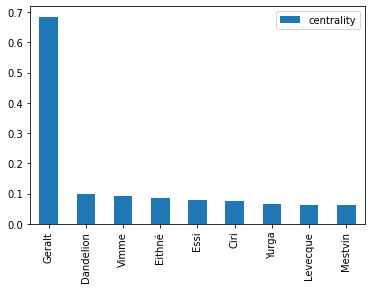

In [122]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot: >

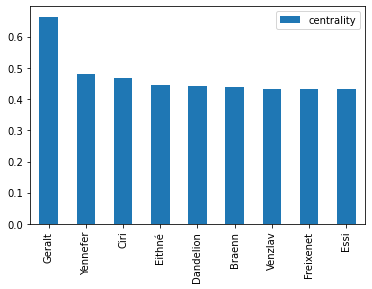

In [123]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [124]:
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [128]:
import community as community_louvain

communities = community_louvain.best_partition(G)
communities

{'Geralt': 4,
 'Niedamir': 1,
 'Eyck': 1,
 'Dorregaray': 1,
 'Yennefer': 1,
 'Yarpen': 1,
 'Gyllenstiern': 1,
 'Kennet': 1,
 'Boholt': 1,
 'Crinfrid': 1,
 'Villentretenmerth': 1,
 'Istredd': 4,
 'Herbolth': 4,
 'Ivo': 4,
 'Two': 4,
 'Vespula': 5,
 'Dainty': 5,
 'Dandelion': 5,
 'Rhyd': 5,
 'Vimme': 3,
 'Ther': 3,
 'Sulimir': 3,
 'Rhundurin': 3,
 'Dudu': 5,
 "Sh'eenaz": 5,
 'Dalia': 5,
 'Teleri': 5,
 'Mestvin': 5,
 'Essi': 5,
 'Gerard': 4,
 'Zelest': 5,
 'Duke': 5,
 'Veverka': 4,
 'Juan': 0,
 'Putzi': 0,
 'Cynthia': 5,
 'Braenn': 2,
 'Ciri': 2,
 'Dunca': 2,
 'Eithné': 2,
 'Marck': 4,
 'Voymir': 4,
 'Ervyll': 2,
 'Kistrin': 2,
 'Vesemir': 2,
 'Freixenet': 2,
 'Venzlav': 2,
 'Viraxas': 2,
 'Morenn': 2,
 'Mona': 2,
 'Forest': 2,
 'Pavetta': 2,
 'Levecque': 2,
 'Junghans': 2,
 'Brick': 2,
 'Mousesack': 2,
 'Yurga': 4,
 'Visenna': 4,
 'Atlan': 4,
 'Vanielle': 4,
 'Lytta': 4,
 'Roach': 4}

In [129]:
nx.set_node_attributes(G, communities, 'group')

In [130]:
com_net = Network(width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_communities.html")

In [131]:
from lib.utils.functions import *

In [137]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('data') if '.txt' in b.name]

# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key = lambda x: x.name)
all_books

[<DirEntry '1 The Last Wish.txt'>,
 <DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '8 something ends something begins.txt'>]

In [138]:
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    # Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G)

/var/folders/qd/kx5sjcnd6899vp4qbrmh9x_m0000gn/T/ipykernel_16245/2481685187.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
/var/folders/qd/kx5sjcnd6899vp4qbrmh9x_m0000gn/T/ipykernel_16245/2481685187.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


<AxesSubplot: >

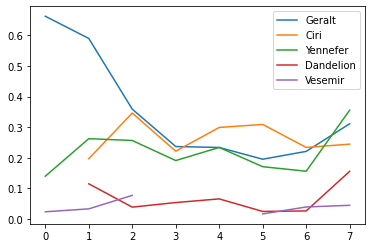

In [139]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()